## Using Digital Image Processing for Sports Analysis

## Golf
* Not Very Easy
* Golf is a game of inches and precision
* Tiny mistakes can be detrimental
* Hiting the ball just an inch from where you want is the difference between hitting the ball 300 yards or 20  

* Golf swings are very analytical and geometrical
* Improved image processintg allows for better analysis and understanding of many aspects of the game
* Goal: Can Digital Image Processing help me suck less at golf. 
![image](C:/Users/catud/Downloads/swing_analysis.jpg)

# Swing Analysis
* By breaking down frames of the swing, one can gain valuable insight into what is going wrong
* Common mistakes include:
    * Swinging too steep
    * Having the bottom of the swing be too far behind the ball
    * Poor Backswing
    * Wrong setup

# Techniques used
* Conditional Random fields for improved segmentation
    * Easier to track desired components
* Canny Edge detection and Hough Transform
    * Used to track the angle and path of the club

## Lining Up Properly

In [1]:
import numpy as np
import cv2
import pydensecrf.densecrf as dcrf
from pydensecrf.utils import unary_from_labels, create_pairwise_bilateral, create_pairwise_gaussian
import matplotlib.pyplot as plt
from IPython.display import display, Image

image = cv2.imread('Downloads/tiger_start.png') # image to segment
mask = cv2.imread('Downloads/tiger_start_mask.png', 0)  # mask created in gimp

In [2]:
# better for jupyternotebook I think
def display_image(img):
    _, encoded_img = cv2.imencode('.png', img)
    display(Image(data=encoded_img.tobytes()))


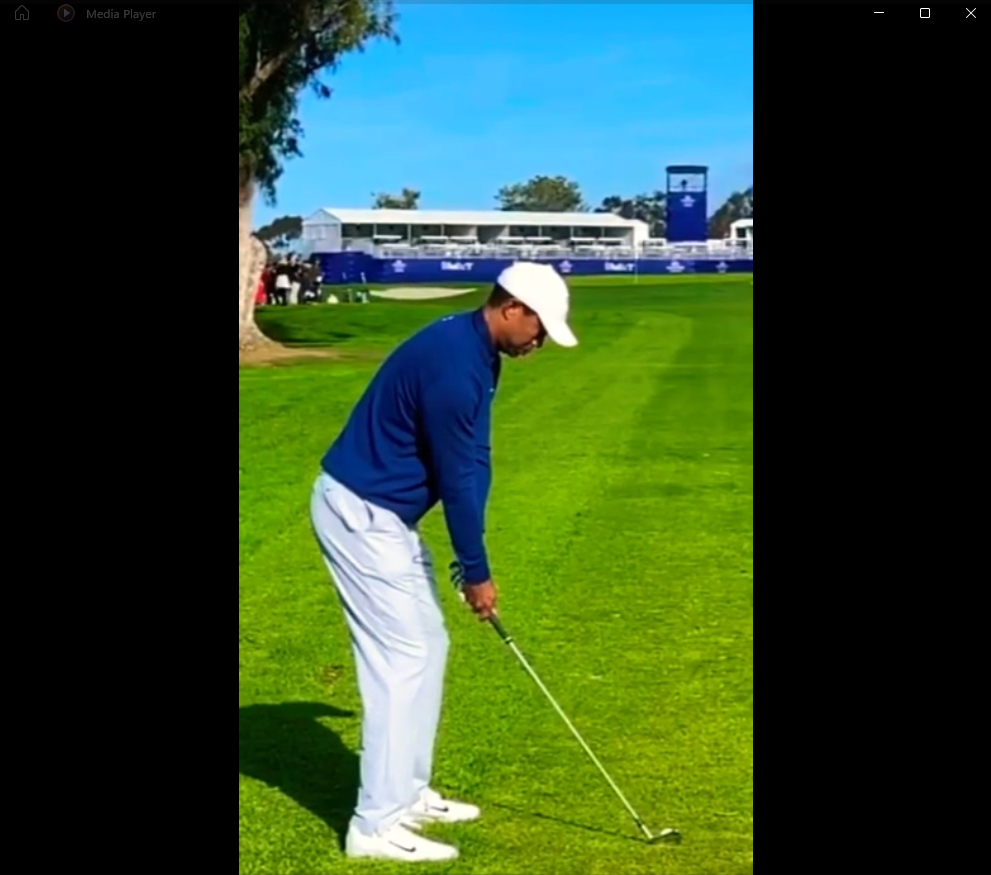

In [3]:
display_image(image)

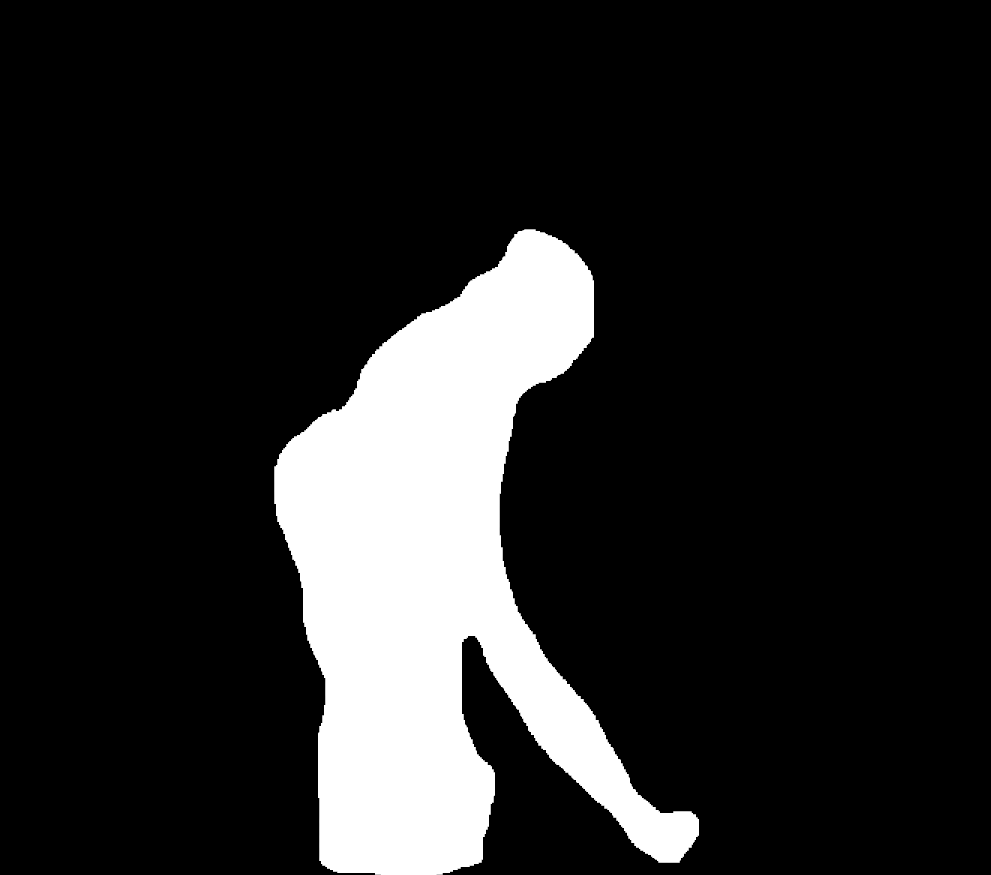

In [4]:
display_image(mask)

In [5]:
mask = (mask > 128).astype(np.uint8)  # Adjust threshold if needed

# Unary Potential
labels = mask.reshape(-1)  # Flatten the mask
n_labels = 2  # Background and foreground


# Building the actual CRF model
# Setting Unary and Pairwise Potential Functions
unary = unary_from_labels(labels, n_labels, gt_prob=0.95, zero_unsure=False) #gt_prob would be from classsifier
crf = dcrf.DenseCRF2D(image.shape[1], image.shape[0], n_labels)  # width, height, n_labels
crf.setUnaryEnergy(unary)
crf.addPairwiseGaussian(sxy=(3, 3), compat=3) # pairwise 1
crf.addPairwiseBilateral(sxy=(80, 80), srgb=(13, 13, 13), rgbim=image, compat=10) # pairwise 2

#Crf.inference uses mean field approximation inference algorithm
Q = crf.inference(100)  # number of iterations to run
map_soln = np.argmax(Q, axis=0).reshape((mask.shape))


refined_mask = (map_soln * 255).astype(np.uint8)

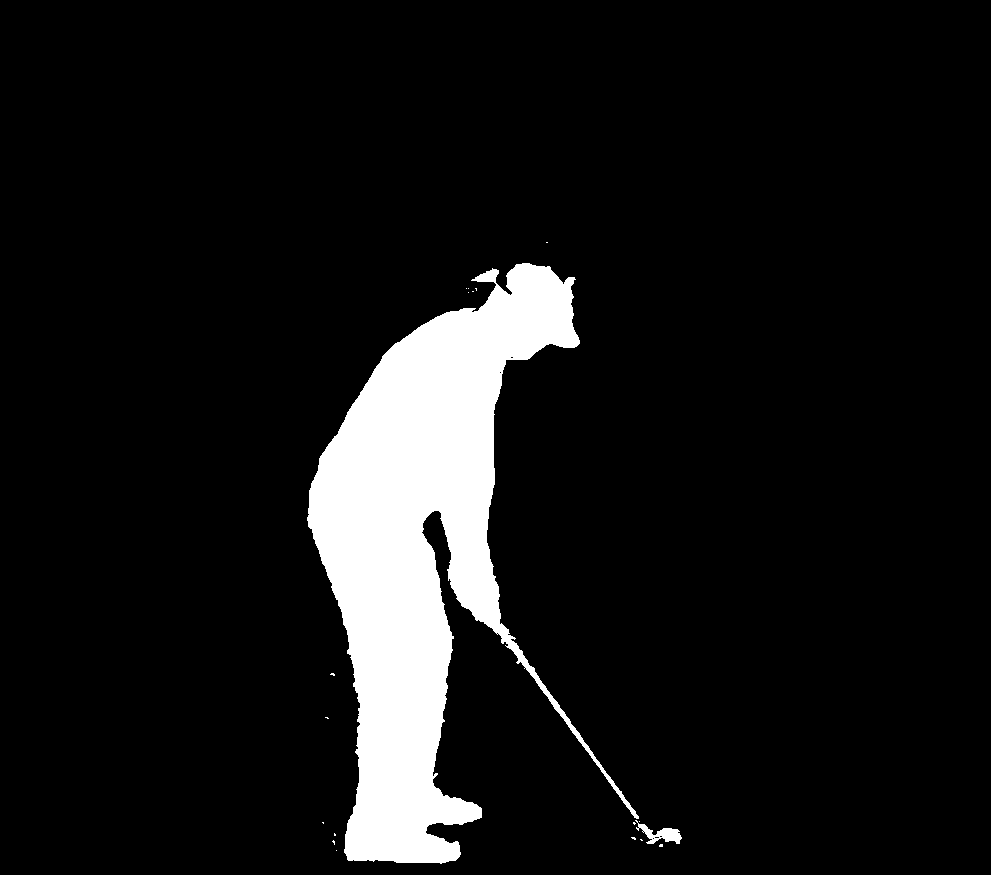

In [6]:
display_image(refined_mask)

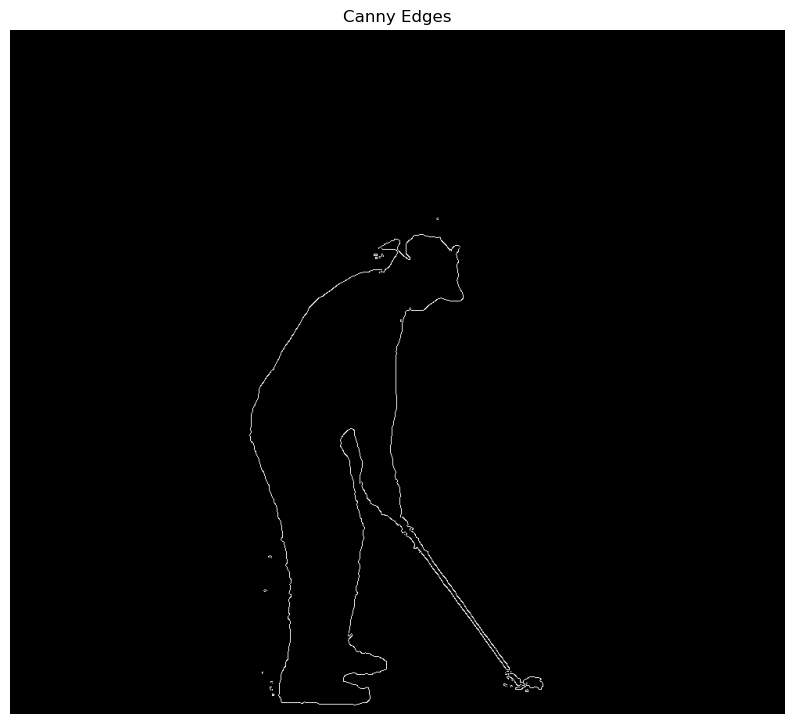

In [7]:
# Edge Detection
edges = cv2.Canny(refined_mask, 50, 150, apertureSize=3)
plt.figure(figsize=(10, 10))
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')
plt.show()

In [8]:
# Hough Line Transform
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=100, maxLineGap=10)
output_image = image.copy() # Lines and angles on image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(output_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

        # find angle
        angle = np.arctan2(y2 - y1, x2 - x1) * 180.0 / np.pi
        print(f'Line from ({x1}, {y1}) to ({x2}, {y2}) has angle {angle:.2f} degrees')


Line from (525, 667) to (653, 843) has angle 53.97 degrees
Line from (540, 680) to (660, 846) has angle 54.14 degrees
Line from (513, 651) to (633, 816) has angle 53.97 degrees


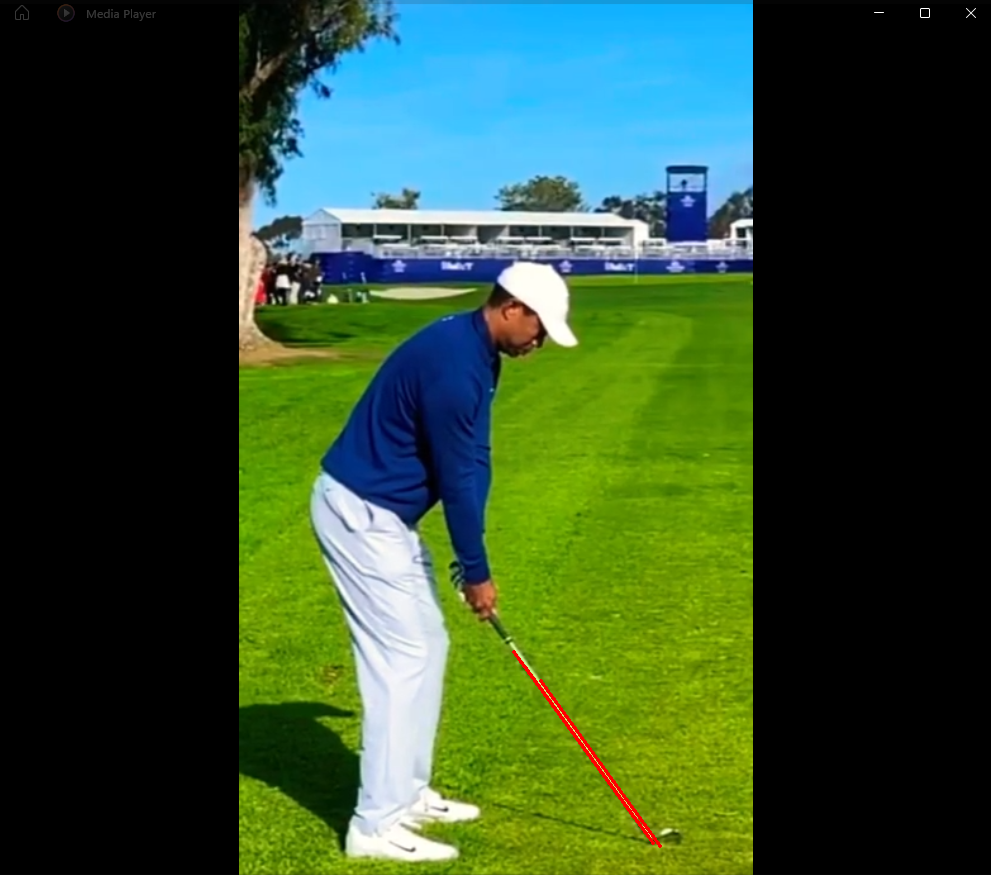

In [9]:
display_image(output_image)

# Downswing

In [10]:
image = cv2.imread('Downloads/tiger_down.png') # image to segment
mask = cv2.imread('Downloads/tiger_down_mask1.png', 0)  # mask created in gimp

mask = (mask > 128).astype(np.uint8)  # setup mask

# Unary Potential
labels = mask.reshape(-1)  # Flatten the mask
n_labels = 2  # Background and foreground


# Building the actual CRF model
# Setting Unary and Pairwise Potential Functions
unary = unary_from_labels(labels, n_labels, gt_prob=0.8, zero_unsure=False) #gt_prob would be from classsifier
crf = dcrf.DenseCRF2D(image.shape[1], image.shape[0], n_labels)  # width, height, n_labels
crf.setUnaryEnergy(unary)
crf.addPairwiseGaussian(sxy=(3, 3), compat=3) # pairwise 1
crf.addPairwiseBilateral(sxy=(80, 80), srgb=(13, 13, 13), rgbim=image, compat=10) # pairwise 2

#Crf.inference uses mean field approximation inference algorithm
Q = crf.inference(4)  # number of iterations to run
map_soln = np.argmax(Q, axis=0).reshape((mask.shape))

refined_mask = (map_soln * 255).astype(np.uint8)

edges = cv2.Canny(refined_mask, 20, 150, apertureSize=3)# Edge Detection 
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 20, minLineLength=100, maxLineGap=10) # Hough Line Transform

output_image = image.copy()


In [11]:
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(output_image, (x1, y1), (x2, y2), (0, 0, 255), 2)
        angle = np.arctan2(y2 - y1, x2 - x1) * 180.0 / np.pi
        print(f'Line from ({x1}, {y1}) to ({x2}, {y2}) has angle {angle:.2f} degrees')


Line from (320, 305) to (406, 433) has angle 56.10 degrees


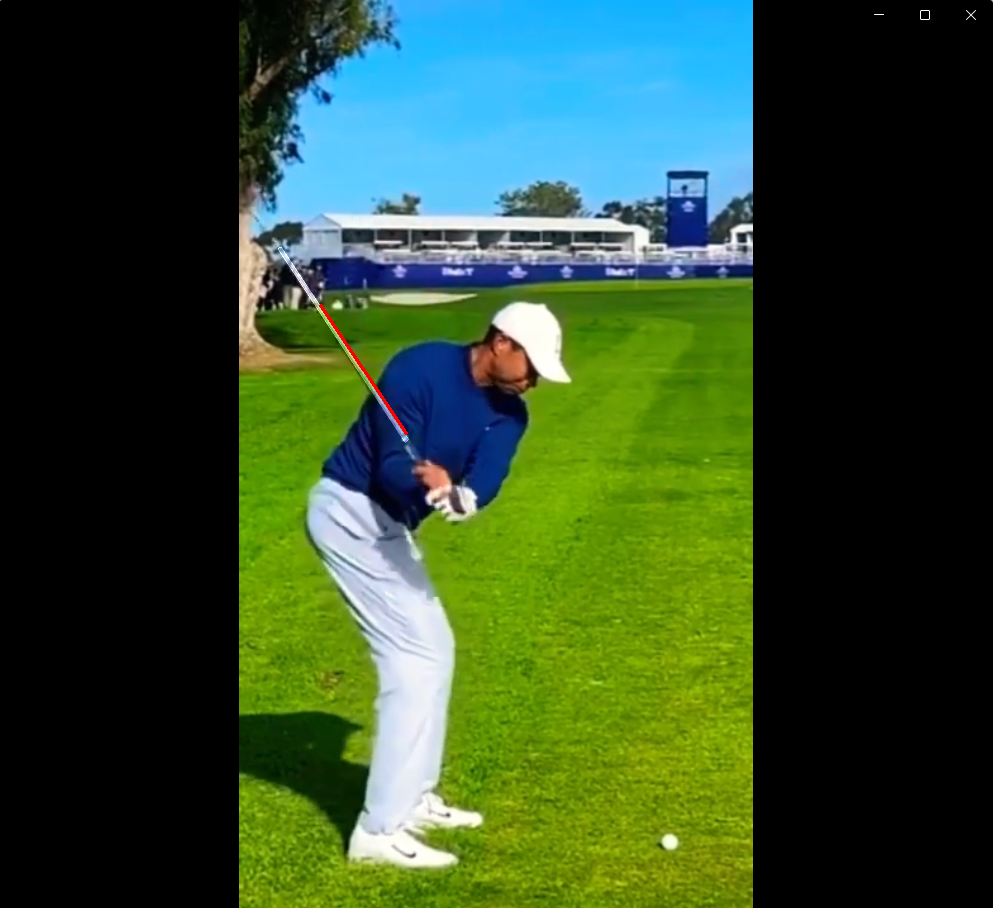

In [12]:
display_image(output_image)

# Lining Up Properly (Other Angle)

In [13]:
image = cv2.imread('Downloads/rory_start.png') # image to segment
mask = cv2.imread('Downloads/rory_start_mask.png', 0)  # mask created in gimp

mask = (mask > 128).astype(np.uint8)  # Adjust threshold if needed

# Unary Potential
labels = mask.reshape(-1)  # Flatten the mask
n_labels = 2  # Background and foreground

# Building the actual CRF model
# Setting Unary and Pairwise Potential Functions
unary = unary_from_labels(labels, n_labels, gt_prob=0.8, zero_unsure=False) #gt_prob would be from classsifier
crf = dcrf.DenseCRF2D(image.shape[1], image.shape[0], n_labels)  # width, height, n_labels
crf.setUnaryEnergy(unary)
crf.addPairwiseGaussian(sxy=(3, 3), compat=3) # pairwise 1
crf.addPairwiseBilateral(sxy=(80, 80), srgb=(13, 13, 13), rgbim=image, compat=10) # pairwise 2

#Crf.inference uses mean field approximation inference algorithm
Q = crf.inference(100)  # number of iterations to run
map_soln = np.argmax(Q, axis=0).reshape((mask.shape))

# Canny and Hough
refined_mask = (map_soln * 255).astype(np.uint8)
edges = cv2.Canny(refined_mask, 50, 150, apertureSize=3)
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 70, minLineLength=100, maxLineGap=10)
output_image = image.copy()


In [14]:
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(output_image, (x1, y1), (x2, y2), (0, 0, 255), 2)
        angle = np.arctan2(y2 - y1, x2 - x1) * 180.0 / np.pi
        print(f'Line from ({x1}, {y1}) to ({x2}, {y2}) has angle {angle:.2f} degrees')



Line from (637, 936) to (655, 796) has angle -82.67 degrees
Line from (640, 939) to (658, 823) has angle -81.18 degrees


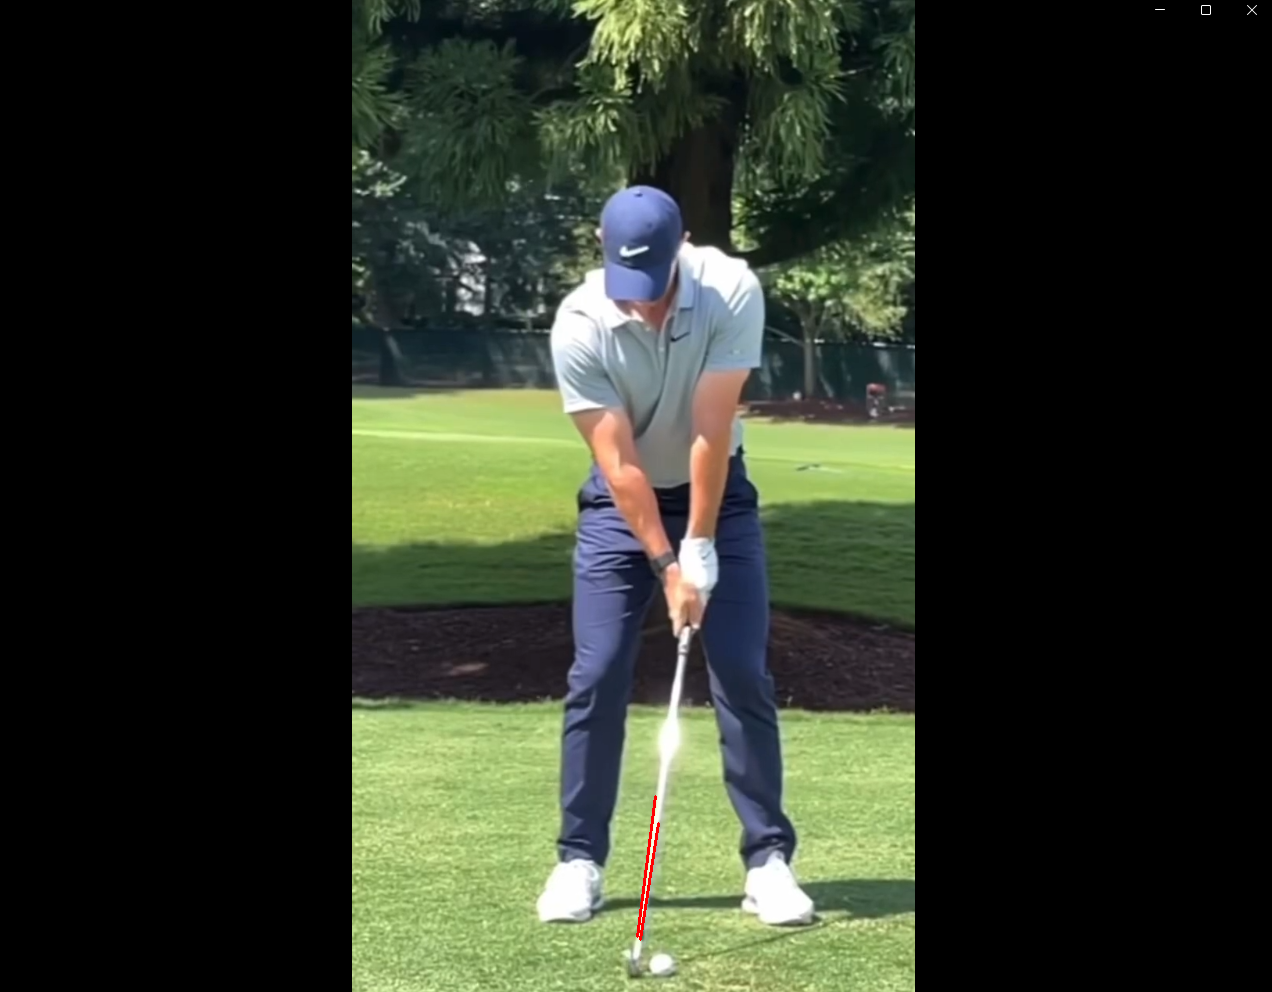

In [15]:
display_image(output_image)

# Swinging the Club

In [16]:
image = cv2.imread('Downloads/rory_back.png') # image to segment
mask = cv2.imread('Downloads/rory_back_mask.png', 0)  # mask created in gimp

mask = (mask > 128).astype(np.uint8) 

# Unary Potential
labels = mask.reshape(-1)  # Flatten the mask
n_labels = 2  # Background and foreground


# Building the actual CRF model
# Setting Unary and Pairwise Potential Functions
unary = unary_from_labels(labels, n_labels, gt_prob=0.8, zero_unsure=False) #gt_prob would be from classsifier
crf = dcrf.DenseCRF2D(image.shape[1], image.shape[0], n_labels)  # width, height, n_labels
crf.setUnaryEnergy(unary)
crf.addPairwiseGaussian(sxy=(3, 3), compat=3) # pairwise 1
crf.addPairwiseBilateral(sxy=(80, 80), srgb=(13, 13, 13), rgbim=image, compat=10) # pairwise 2

#Crf.inference uses mean field approximation inference algorithm
Q = crf.inference(20)  # number of iterations to run
map_soln = np.argmax(Q, axis=0).reshape((mask.shape))

# Canny and Hough
refined_mask = (map_soln * 255).astype(np.uint8)
edges = cv2.Canny(refined_mask, 20, 200, apertureSize=3)
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, minLineLength=100, maxLineGap=10)
output_image = image.copy()


In [17]:
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(output_image, (x1, y1), (x2, y2), (0, 0, 255), 2)
        angle = np.arctan2(y2 - y1, x2 - x1) * 180.0 / np.pi
        print(f'Line from ({x1}, {y1}) to ({x2}, {y2}) has angle {angle:.2f} degrees')



Line from (292, 252) to (302, 141) has angle -84.85 degrees
Line from (289, 150) to (297, 22) has angle -86.42 degrees


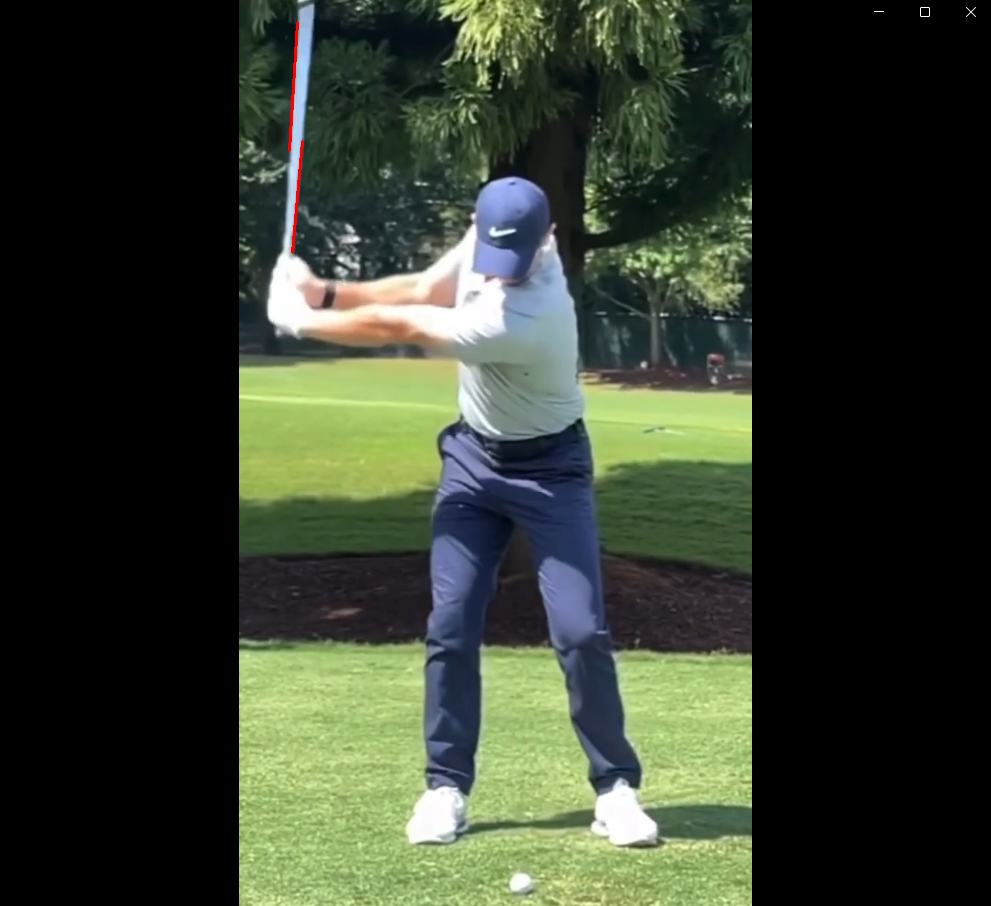

In [18]:
display_image(output_image)

# Striking the Ball

In [19]:
image = cv2.imread('Downloads/rory_strike.png') # image to segment
mask = cv2.imread('Downloads/rory_strike_mask1.png', 0)  # mask created in gimp

mask = (mask > 128).astype(np.uint8)  # Adjust threshold if needed

# Unary Potential
labels = mask.reshape(-1)  # Flatten the mask
n_labels = 2  # Background and foreground


# Building the actual CRF model
# Setting Unary and Pairwise Potential Functions
unary = unary_from_labels(labels, n_labels, gt_prob=0.8, zero_unsure=False) #gt_prob would be from classsifier
crf = dcrf.DenseCRF2D(image.shape[1], image.shape[0], n_labels)  # width, height, n_labels
crf.setUnaryEnergy(unary)
crf.addPairwiseGaussian(sxy=(3, 3), compat=3) # pairwise 1
crf.addPairwiseBilateral(sxy=(80, 80), srgb=(13, 13, 13), rgbim=image, compat=10) # pairwise 2

#Crf.inference uses mean field approximation inference algorithm
Q = crf.inference(20)  # number of iterations to run
map_soln = np.argmax(Q, axis=0).reshape((mask.shape))
refined_mask = (map_soln * 255).astype(np.uint8)
edges = cv2.Canny(refined_mask, 20, 200, apertureSize=3)

# Canny and Hough
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 30, minLineLength=100, maxLineGap=10)
output_image = image.copy()


In [20]:
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(output_image, (x1, y1), (x2, y2), (0, 0, 255), 2)
        angle = np.arctan2(y2 - y1, x2 - x1) * 180.0 / np.pi
        print(f'Line from ({x1}, {y1}) to ({x2}, {y2}) has angle {angle:.2f} degrees')



Line from (650, 614) to (652, 718) has angle 88.90 degrees


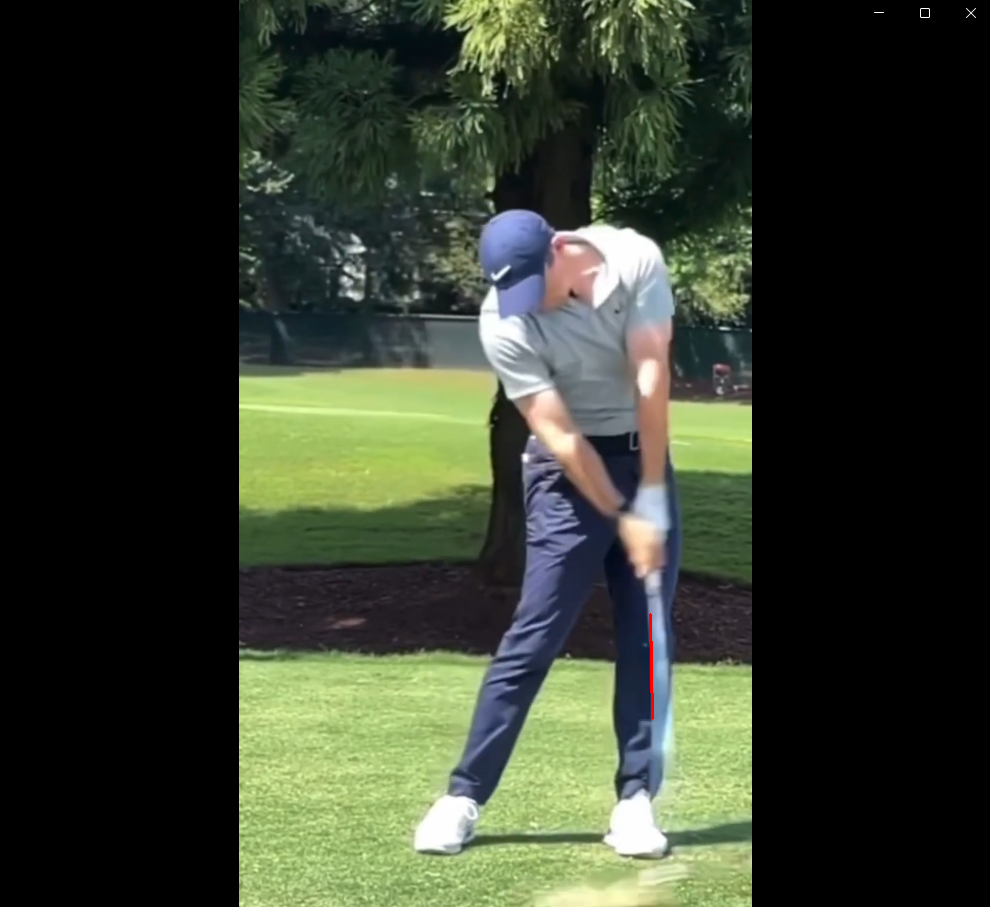

In [21]:
display_image(output_image)

# 3D Reconstruction for Course Analysis

* Reading The greens can be tricky
* Not sure which direction the ball is going to roll
* Can use 3D reconstruction 
* Better Understand where the ball is going to roll

![image](C:/Users/catud/Downloads/green_slope.jpg)
![image](C:/Users/catud/Downloads/green_slope_line.jpg)

# Techniques Used
* Pre-processing with Histogram equilization and gaussian blur to enhance contrast
* Feature Detection using SIFT (Scale-Invariant Feature Transform)
* Feature matching using FLANN (Fast Library for Approximate Nearest Neighbors)
* outlier removal with RANSAC (Random sample consensus)
* Triangulation for 3D points

# Example Usage
* Controlled test

In [22]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

In [23]:
def preprocess_image(img):

    img_eq = cv2.equalizeHist(img)    # Histogram equalization
    img_blur = cv2.GaussianBlur(img_eq, (5, 5), 0)    # Gaussian blur
    # Sharpening
    kernel = np.array([[0, -1, 0],     
                       [-1, 5, -1],
                       [0, -1, 0]])
    img_sharp = cv2.filter2D(img_blur, -1, kernel)
    
    return img_sharp

In [24]:
# Load
img1 = cv2.imread('Downloads/fab3.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('Downloads/fab4.jpg', cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('Downloads/good1.jpg', cv2.IMREAD_GRAYSCALE)
img4 = cv2.imread('Downloads/good2.jpg', cv2.IMREAD_GRAYSCALE)

# create sift
sift = cv2.SIFT_create()

img1_preprocessed = preprocess_image(img1) # Preprocess 
img2_preprocessed = preprocess_image(img2)

kp1, des1 = sift.detectAndCompute(img1_preprocessed, None) # find keypoints
kp2, des2 = sift.detectAndCompute(img2_preprocessed, None)

In [25]:
# FLANN feature matching
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# set good threshold
good_matches = [m for m, n in matches if m.distance < 0.7 * n.distance]
points1 = np.float32([kp1[m.queryIdx].pt for m in good_matches])
points2 = np.float32([kp2[m.trainIdx].pt for m in good_matches])

# RANSAC for outliers and inliers
F, mask = cv2.findFundamentalMat(points1, points2, cv2.FM_RANSAC)
inliers1 = points1[mask.ravel() == 1]
inliers2 = points2[mask.ravel() == 1]


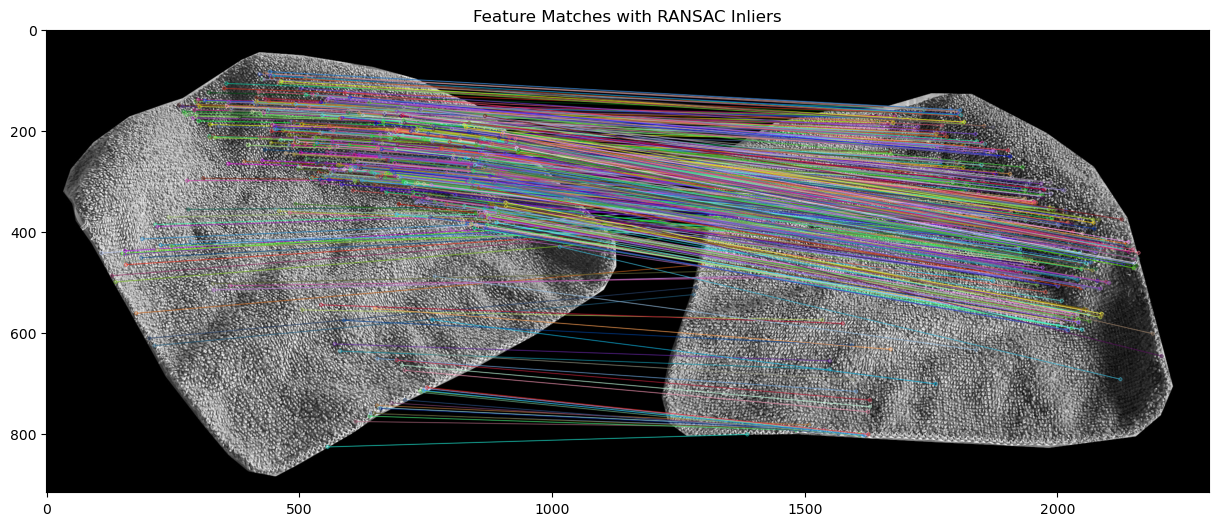

In [26]:
# inliers only
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, [good_matches[i] for i in range(len(good_matches)) if mask[i]], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(15, 10))
plt.imshow(img_matches, cmap='gray')
plt.title('Feature Matches with RANSAC Inliers')
plt.show()

In [136]:
#Create instrinsic camera matrix
img_height, img_width = img1.shape
# print(img_height, img_width)
fx = 2570.0
fy = 2570.0
cx = img_width / 2.0
cy = img_height / 2.0
K = np.array([
    [fx, 0, cx],
    [0, fy, cy],
    [0, 0, 1]
])

# essential matrix
E, mask = cv2.findEssentialMat(inliers1, inliers2, focal=fx, pp=(cx, cy), method=cv2.RANSAC, prob=0.999, threshold=1.0)
points, R, t, mask = cv2.recoverPose(E, inliers1, inliers2, focal=fx, pp=(cx, cy))

print("Rotation Matrix:\n", R)
print("Translation Vector:\n", t)


Rotation Matrix:
 [[ 0.71179111 -0.35565782  0.60569046]
 [ 0.33416587  0.92995362  0.15336047]
 [-0.61780788  0.09324046  0.78078143]]
Translation Vector:
 [[-0.92167377]
 [-0.18586577]
 [ 0.34054569]]


In [28]:
# Function to create 3D points
def create_3D_points(points1, points2, K, R, t):
    # to homogenous
    points1_hom = cv2.convertPointsToHomogeneous(points1)[:, 0, :]
    points2_hom = cv2.convertPointsToHomogeneous(points2)[:, 0, :]

    P1 = K @ np.hstack((np.eye(3), np.zeros((3, 1))))# Projection matrices
    P2 = K @ np.hstack((R, t))

    points_3D_hom = cv2.triangulatePoints(P1, P2, points1.T, points2.T)  # Triangulate points
    points_3D_hom /= points_3D_hom[3]# Normalize points
    points_3D = points_3D_hom[:3].T# homogeneous to 3D

    return points_3D

# Create 3D points
points_3D = create_3D_points(inliers1, inliers2, K, R, t)
# print(f"Points 3D shape: {points_3D.shape}")

In [29]:
# Scale the coordinates
def scale_coordinates(points, img_width, img_height):
    min_vals = points.min(axis=0)
    max_vals = points.max(axis=0)
    scaled_points = (points - min_vals) / (max_vals - min_vals)
    scaled_points[:, 0] *= img_width
    scaled_points[:, 1] *= img_height
    return scaled_points

points_3D_scaled = scale_coordinates(points_3D, img1.shape[1], img1.shape[0])

# Generate height map
x = points_3D_scaled[:, 0]
y = points_3D_scaled[:, 1]
z = points_3D_scaled[:, 2]

grid_x, grid_y = np.mgrid[0:img1.shape[1]:100j, 0:img1.shape[0]:100j]
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

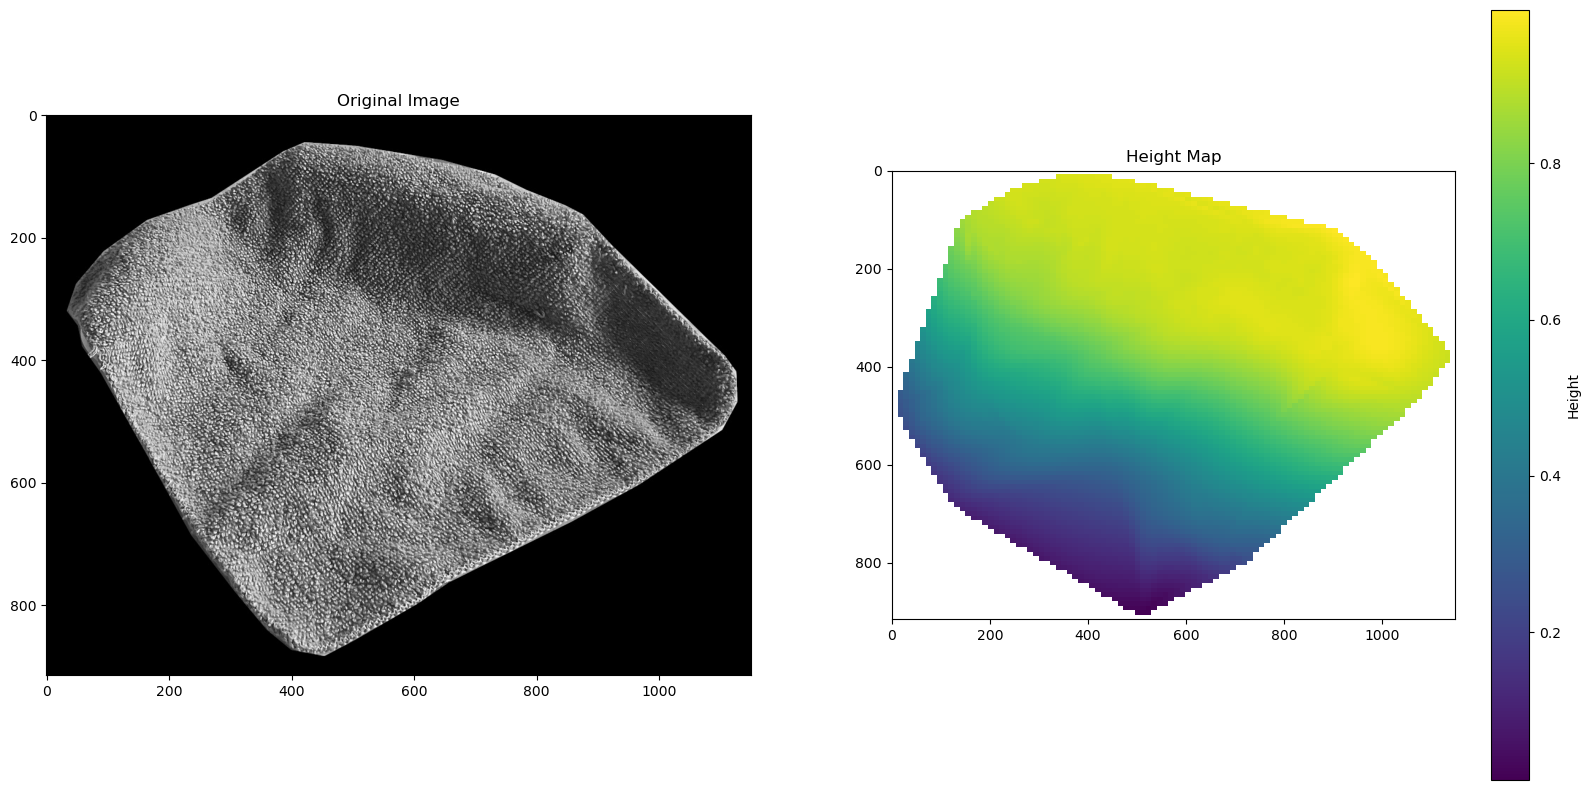

In [30]:
# Plot
plt.figure(figsize=(20, 10))
#Original
plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title('Original Image')
#HEight
plt.subplot(1, 2, 2)
plt.imshow(grid_z.T, extent=(0, img1.shape[1], img1.shape[0], 0), origin='upper', cmap='viridis')
plt.colorbar(label='Height')
plt.title('Height Map')

plt.show()

# Now on an actual golf course

In [144]:
# Preprocess 
img3_preprocessed = preprocess_image(img3)
img4_preprocessed = preprocess_image(img4)
# run sift
kp3, des1 = sift.detectAndCompute(img3_preprocessed, None)
kp4, des2 = sift.detectAndCompute(img4_preprocessed, None)

In [145]:
# FLANN
FLANN_INDEX_KDTREE = 1
index_params2 = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params2 = dict(checks=50)
flann2 = cv2.FlannBasedMatcher(index_params2, search_params2)
matches2 = flann2.knnMatch(des1, des2, k=2)

# set threshold for good 
good_matches2 = [m for m, n in matches2 if m.distance < 1 * n.distance]
points3 = np.float32([kp3[m.queryIdx].pt for m in good_matches2])
points4 = np.float32([kp4[m.trainIdx].pt for m in good_matches2])

#RANSAC
F, mask2 = cv2.findFundamentalMat(points3, points4, cv2.FM_RANSAC)
inliers3 = points3[mask2.ravel() == 1]
inliers4 = points4[mask2.ravel() == 1]

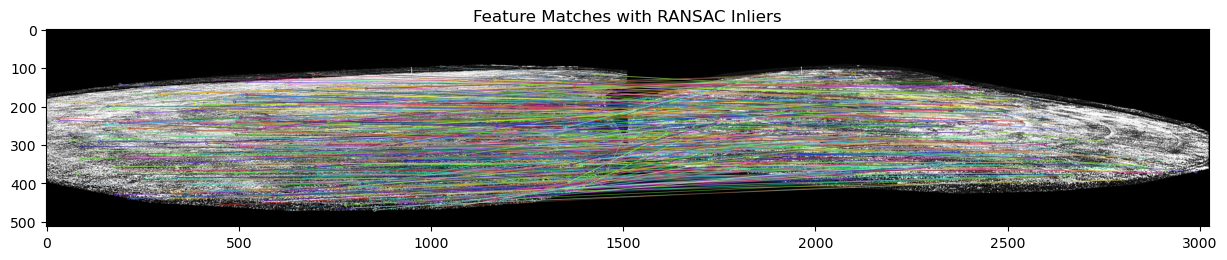

In [146]:
# Draw matches
img_matches2 = cv2.drawMatches(img3_preprocessed, kp3, img4_preprocessed, kp4, [good_matches2[i] for i in range(len(good_matches2)) if mask2[i]], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(15, 10))
plt.imshow(img_matches2, cmap='gray')
plt.title('Feature Matches with RANSAC Inliers')
plt.show()

In [147]:
# essential matrix
E, mask2 = cv2.findEssentialMat(inliers3, inliers4, focal=fx, pp=(cx, cy), method=cv2.RANSAC, prob=0.999, threshold=1.0)
points, R2, t2, mask2 = cv2.recoverPose(E, inliers3, inliers4, focal=fx, pp=(cx, cy))

# print("Rotation Matrix:\n", R)
# print("Translation Vector:\n", t)

In [148]:
# Create 3D points
points_3D2 = create_3D_points(inliers3, inliers4, K, R2, t2)
# print(f"Points 3D shape: {points_3D2.shape}")

In [149]:
points_3D_scaled2 = scale_coordinates(points_3D2, img3.shape[1], img3.shape[0])

# height map
x2 = points_3D_scaled2[:, 0]
y2 = points_3D_scaled2[:, 1]
z2 = points_3D_scaled2[:, 2]

grid_x2, grid_y2 = np.mgrid[0:img3.shape[1]:100j, 0:img3.shape[0]:100j]
grid_z2 = griddata((x2, y2), z2, (grid_x2, grid_y2), method='cubic')

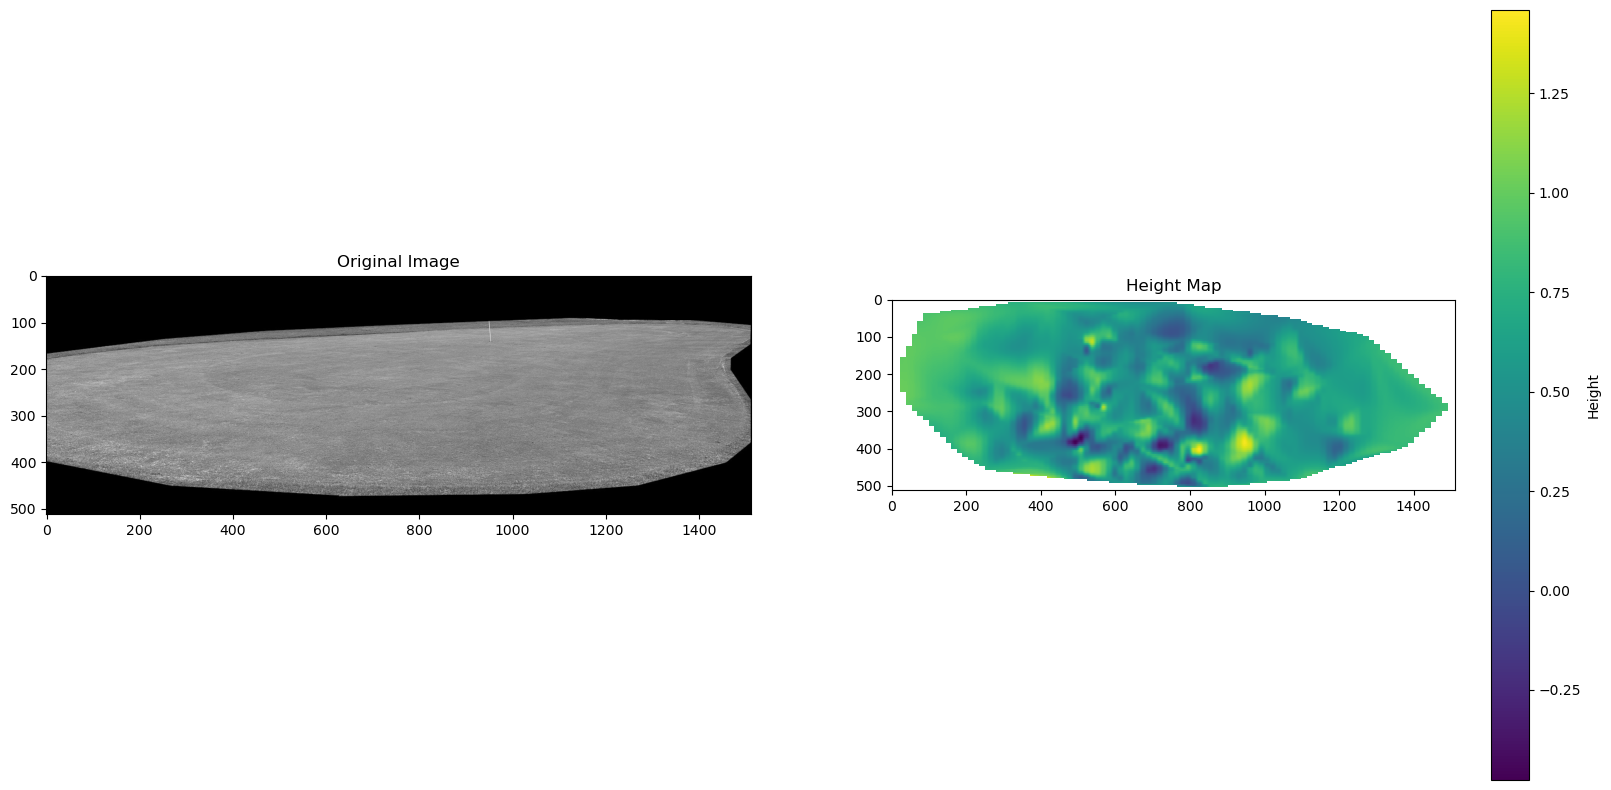

In [150]:
# Plot
plt.figure(figsize=(20, 10))
# original 
plt.subplot(1, 2, 1)
plt.imshow(img3, cmap='gray')
plt.title('Original Image')
# Height
plt.subplot(1, 2, 2)
plt.imshow(grid_z2.T, extent=(0, img3_preprocessed.shape[1], img3_preprocessed.shape[0], 0), origin='upper', cmap='viridis')
plt.colorbar(label='Height')
plt.title('Height Map')

plt.show()

# Needs some work
* There aren't many distinguishing features
* better and more consistent pictures
* Improve with more pictures and exact parameters

# Countless more possibilities